In [1]:
using FermiCG
using PyCall
using Plots
using LinearAlgebra
using Printf

┌ Info: Precompiling FermiCG [855c3b3a-d9bb-4919-8b00-0b3cfbdffb6f]
└ @ Base loading.jl:1278


Define molecule and run HF

In [86]:
molecule = "
C     1.259020     0.711710     0.000000
C     2.503660     1.386310     0.000000
C     3.708550     0.701730     0.000000
C     3.708550    -0.701730     0.000000
C     2.503660    -1.386310     0.000000
C     1.259020    -0.711710     0.000000
C    -0.013150    -1.446190     0.000000
C    -0.051250    -2.861390     0.000000
C    -1.246560    -3.562570     0.000000
C    -2.461990    -2.860840     0.000000
C    -2.452410    -1.475080     0.000000
C    -1.245860    -0.734490     0.000000
C    -1.245860     0.734490     0.000000
C    -0.013150     1.446190     0.000000
C    -0.051250     2.861390     0.000000
C    -1.246560     3.562570     0.000000
C    -2.461990     2.860840     0.000000
C    -2.452410     1.475080     0.000000
H     2.529850     2.475260     0.000000
H     4.650090     1.255640     0.000000
H     4.650090    -1.255640     0.000000
H     2.529850    -2.475260     0.000000
H     0.878710    -3.428550     0.000000
H    -1.237620    -4.654920     0.000000
H    -3.412460    -3.399270     0.000000
H    -3.408560    -0.953290     0.000000
H     0.878710     3.428550     0.000000
H    -1.237620     4.654920     0.000000
H    -3.412460     3.399270     0.000000
H    -3.408560     0.953290     0.000000
"

atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

cas_nel = 18
cas_norb = 18

basis = "sto-3g"

# 
# Create FermiCG.Molecule type
mol     = Molecule(0,1,atoms,basis)

#SCF with relativistic effect
pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = true,spin =0,charge=0,
    basis = basis)


pymol.build()
print("symmetry: ",pymol.topgroup)
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-10
mf.conv_tol_grad = 1e-8
mf.chkfile = "tmp.fchk"
#mf.init_guess = 'chkfile'
mf.run(max_cycle=200)
# mf.kernel()

symmetry: C2v

******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF-RHF
initial guess = minao
damping factor = 0
level shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
DIIS start cycle = 1
DIIS space = 8
SCF tol = 1e-10
SCF gradient tol = 1e-08
max. SCF cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = tmp.fchk
max_memory 4000 MB (current use 0 MB)
init E= -688.732891963
HOMO (B2) = -0.242251125735786  LUMO (A2) = -0.00953168072093851
cycle= 1 E= -680.174082286047  delta_E= 8.56  |g|= 0.489  |ddm|= 7.61
HOMO (B2) = -0.201656662717299  LUMO (A2) = 0.212796033250246
cycle= 2 E= -680.274218036567  delta_E= -0.1  |g|= 0.125  |ddm|= 0.948
HOMO (B2) = -0.228272131276167  LUMO (A2) = 0.191026461396784
cycle= 3 E= -680.280405302897  delta_E= -0.00619  |g|= 0.0487  |ddm|= 0.284
HOMO (B2) = -0.222296341704349  LUMO (A2) = 0.198351019678618
cycle= 4 E= -680.281247205546  delta_E= -0.000842  |g|= 0.00672  |ddm|= 0.072
HOMO (B2) =

PyObject <pyscf.scf.hf_symm.SymAdaptedRHF object at 0x171276e50>

In [96]:
molecule = "
C     1.259020     0.711710     0.000000
C     2.503660     1.386310     0.000000
C     3.708550     0.701730     0.000000
C     3.708550    -0.701730     0.000000
C     2.503660    -1.386310     0.000000
C     1.259020    -0.711710     0.000000
C    -0.013150    -1.446190     0.000000
C    -0.051250    -2.861390     0.000000
C    -1.246560    -3.562570     0.000000
C    -2.461990    -2.860840     0.000000
C    -2.452410    -1.475080     0.000000
C    -1.245860    -0.734490     0.000000
C    -1.245860     0.734490     0.000000
C    -0.013150     1.446190     0.000000
C    -0.051250     2.861390     0.000000
C    -1.246560     3.562570     0.000000
C    -2.461990     2.860840     0.000000
C    -2.452410     1.475080     0.000000
H     2.529850     2.475260     0.000000
H     4.650090     1.255640     0.000000
H     4.650090    -1.255640     0.000000
H     2.529850    -2.475260     0.000000
H     0.878710    -3.428550     0.000000
H    -1.237620    -4.654920     0.000000
H    -3.412460    -3.399270     0.000000
H    -3.408560    -0.953290     0.000000
H     0.878710     3.428550     0.000000
H    -1.237620     4.654920     0.000000
H    -3.412460     3.399270     0.000000
H    -3.408560     0.953290     0.000000
"

atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

cas_nel = 18
cas_norb = 18

basis = "sto-3g"

# 
# Create FermiCG.Molecule type
mol     = Molecule(0,1,atoms,basis)

# #SCF with relativistic effect
# pyscf = pyimport("pyscf")
# # pyscf.lib.num_threads(1)


# pymol = pyscf.gto.Mole(atom=molecule,
#     symmetry = true,spin =0,charge=0,
#     basis = basis)


# pymol.build()
# print("symmetry: ",pymol.topgroup)
# mf = pyscf.scf.RHF(pymol)
# mf.verbose = 4
# mf.conv_tol = 1e-10
# mf.conv_tol_grad = 1e-8
# mf.chkfile = "tmp.fchk"
# #mf.init_guess = 'chkfile'
# # mf = mf.density_fit()
# # mf.with_df.auxbasis = "weigend"
# mf.run(max_cycle=200)

mf = FermiCG.pyscf_do_scf(mol, verbose=2)
C = mf.mo_coeff
nbas = size(C)[1]
FermiCG.pyscf_write_molden(mol, C, filename="hf_canonical.molden")

# 
# Number of electrons
tot_na = (18*6 + 12) ÷ 2
tot_nb = (18*6 + 12) ÷ 2
tot_n_elec = tot_na + tot_nb
@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

sto-3g


102-element Array{Float64,1}:
 -11.041075708840053
 -11.041075673288894
 -11.040924278756746
 -11.040858789784883
 -11.04083193647386
 -11.040831850226548
 -11.029827383791112
 -11.029827238310002
 -11.029826431183302
 -11.029624820369254
 -11.029623773823342
 -11.02962364306834
 -11.027538286435924
   ⋮
   0.9248900757672088
   0.9248937417480887
   0.9286254956798242
   0.9387291787313315
   0.9387326884770245
   0.9713920279356373
   1.0676391635117328
   1.0676408349507354
   1.114553864866198
   1.114554178398731
   1.1641697794043098
   1.1900130901612465

MO Energies
 Hartree-Fock Energy: -680.28127569

Now separate π and σ spaces. For now, I've manually inspected the orbitals to separate out the π space. However, we eventually will want automated ways to do this.

In [97]:
#
# Get active space
act_space = [46, 51, 52, collect(55:68)..., 72]
n_frozen = 51
#n_frozen = 4*18 + 12
inactive_space = setdiff(1:nbas,act_space)


occ_space = inactive_space[1:n_frozen]
vir_space = inactive_space[n_frozen+1:end]
Cact = C[:,act_space]
Cocc = C[:,occ_space]
Cvir = C[:,vir_space]

n_core = 18
core_space = inactive_space[1:n_core]
sig_space = inactive_space[n_core+1:end]
Csig = C[:,sig_space]

# Number of active electrons 
ne = 18
na = 9
nb = 9
#
# Localize Orbitals (split localize active)
split_loc = false
if split_loc
    Cact[:,1:na] = FermiCG.localize(Cact[:,1:na], "boys", mf)
    Cact[:,na+1:end] = FermiCG.localize(Cact[:,na+1:end], "boys", mf)
else
    Cact = FermiCG.localize(Cact, "boys", mf)
end
Csig = FermiCG.localize(Csig, "boys", mf)
FermiCG.pyscf_write_molden(mol, Cact, filename="act.molden")
FermiCG.pyscf_write_molden(mol, Csig, filename="sig.molden")



Set conv_tol_grad to 0.000316228
macro= 1  f(x)= -485.57895358516  delta_f= -485.579  |g|= 0.0469574  1 KF 3 Hx
macro= 2  f(x)= -485.57895358516  delta_f= 0  |g|= 2.81338e-07  1 KF 1 Hx
macro X = 2  f(x)= -485.57895358516  |g|= 2.81338e-07  4 intor 2 KF 4 Hx
Set conv_tol_grad to 0.000316228
macro= 1  f(x)= -2316.395402085  delta_f= -2316.4  |g|= 2.87731  4 KF 20 Hx
macro= 2  f(x)= -2327.3483633318  delta_f= -10.953  |g|= 1.92281  4 KF 20 Hx
macro= 3  f(x)= -2329.9862808713  delta_f= -2.63792  |g|= 0.545222  3 KF 9 Hx
macro= 4  f(x)= -2329.9966156143  delta_f= -0.0103347  |g|= 0.000104793  3 KF 7 Hx
macro= 5  f(x)= -2329.9966156143  delta_f= 0  |g|= 5.78963e-05  1 KF 1 Hx
macro X = 5  f(x)= -2329.9966156143  |g|= 5.78963e-05  10 intor 15 KF 57 Hx


1

Using these orbitals, let's semi-algorithmically cluster the system. We'll start by separately looking at the π and σ spaces. Using these orbital orderings, we can inspect to see how local the exchange matrix is.


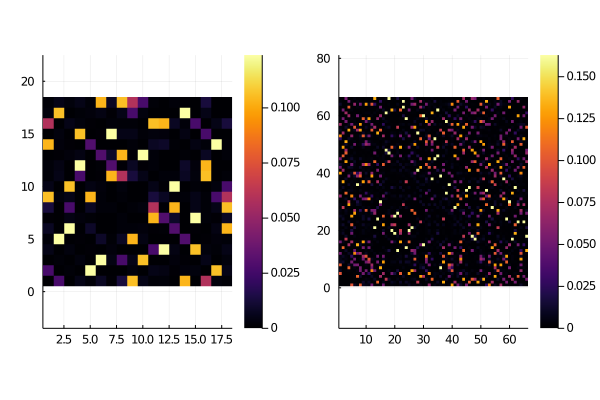

In [98]:
#
# Using these orbitals, let's semi-algorithmically cluster the system. 
# We'll start by separately looking at the π and σ spaces
# Using these orbital orderings, we can inspect to see how local the exchange matrix is
h,j,k = FermiCG.pyscf_get_jk(mol, C[:,1:tot_na] * C[:,1:tot_na]');

k1 = Cact'*(k)*Cact
k2 = Csig'*(k)*Csig
k1 = k1 - Diagonal(diag(k1))
k2 = k2 - Diagonal(diag(k2))
p1 = heatmap(abs.(k1), aspect_ratio=:equal)
p2 = heatmap(abs.(k2), aspect_ratio=:equal)
plot(p1, p2, layout = @layout [a  b])

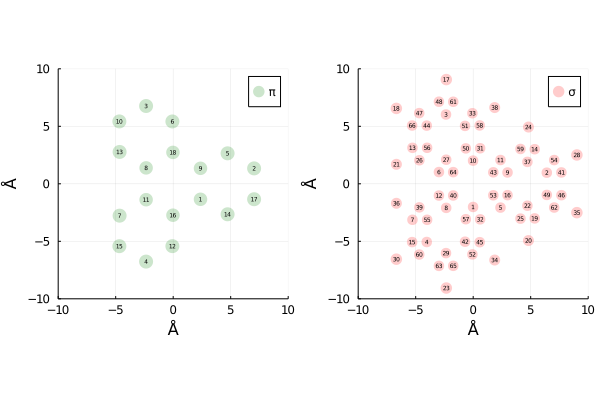

In [99]:
# 
# We can also inspect the orbital positions by looking at <r> and <r⋅r>
pymol = FermiCG.make_pyscf_mole(mol);
r1 = pymol.intor_symmetric("int1e_r");
r2 = pymol.intor_symmetric("int1e_r2");
rx_act = Cact'*r1[1,:,:]*Cact;
ry_act = Cact'*r1[2,:,:]*Cact;
rz_act = Cact'*r1[3,:,:]*Cact;
rx_sig = Csig'*r1[1,:,:]*Csig;
ry_sig = Csig'*r1[2,:,:]*Csig;
rz_sig = Csig'*r1[3,:,:]*Csig;
r2_act = Cact'*r2*Cact;
r2_sig = Csig'*r2*Csig;

var_act = diag(r2_act) - diag(rx_act).*diag(rx_act)- diag(ry_act).*diag(ry_act)- diag(rz_act).*diag(rz_act)
var_sig = diag(r2_sig) - diag(rx_sig).*diag(rx_sig)- diag(ry_sig).*diag(ry_sig)- diag(rz_sig).*diag(rz_sig)


p1 = scatter(diag(rx_act), diag(ry_act), aspect_ratio=:equal, 
    markersize=5*sqrt.(var_act), 
    labels="π",xlims=(-10,10),ylims=(-10,10),  legendfont = font(8),    
    markeralpha = 0.2,
    markercolor = :green,
    markerstrokewidth = 0,
)

[annotate!(rx_act[i,i],ry_act[i,i],i, font(4)) for i in 1:size(rx_act,1)]

p2 = scatter(diag(rx_sig), diag(ry_sig), aspect_ratio=:equal, 
    markersize=5*sqrt.(var_sig), 
    labels="σ",xlims=(-10,10),ylims=(-10,10),     
    markeralpha = 0.2,
    markercolor = :red,
    markerstrokewidth = 0,
)
[annotate!(rx_sig[i,i],ry_sig[i,i],i, font(4)) for i in 1:size(rx_sig,1)]

# p3 = scatter([diag(rx_act), diag(rx_sig)], [diag(ry_act), diag(ry_sig)], aspect_ratio=:equal, 
#     markersize=5*sqrt.([var_act..., var_sig...]), 
#     labels="σ",xlims=(-10,10),ylims=(-10,10),     
#     markeralpha = 0.2,
#     markercolor = :red,
#     markerstrokewidth = 0,
# )
# [annotate!(rx_sig[i,i],ry_sig[i,i],i, font(4)) for i in 1:size(rx_sig,1)]

plot(p1, p2, layout = @layout [a  b]
)
xlabel!("Å")
ylabel!("Å")

# 
# x and y axes are in units of Å. Each point corresponds to the mean position of the orbital, and the marker size 
# is 2*log(<r⋅r>). Thus, larger dots are more diffuse.

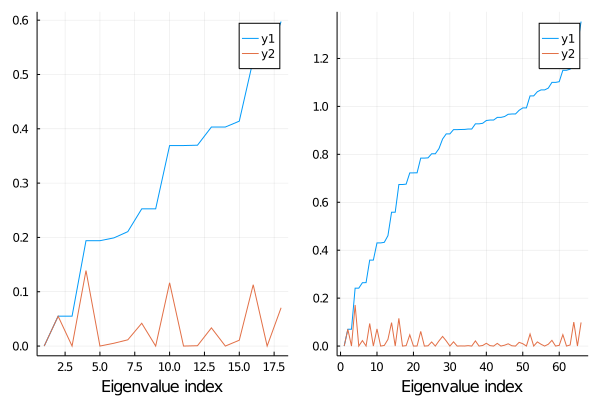

In [100]:
#
# From here, we could manually cluster. But we can instead try to use a k-means approach to spectral clustering. 
using Clustering
using SpectralClustering
# h,j,k = FermiCG.pyscf_get_jk(mol, C[:,1:tot_na] * C[:,1:tot_na]');


k1 = Cact'*(k)*Cact;
k2 = Csig'*(k)*Csig;

nvecs = 3
A = abs.(k1)
L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
F = eigen(L);
p1 = plot(F.values, xlabel="Eigenvalue")
p1 = plot!( [0,[F.values[i+1]-F.values[i] for i in 1:length(F.values)-1]...], xlabel="Eigenvalue index")

A_act = F.vectors[:,1:nvecs]*F.vectors[:,1:nvecs]'
clustering_act = clusterize(KMeansClusterizer(nvecs), A_act).assignments;
perm_act = sortperm(clustering_act)
p2 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")
A_act = A_act[perm_act, perm_act]
p3 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")

Cact_sorted = Cact[:,perm_act]

nvecs = 3
A = abs.(k2)
L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
F = eigen(L);
p4 = plot( F.values, xlabel="Eigenvalue index")
p4 = plot!( [0,[F.values[i+1]-F.values[i] for i in 1:length(F.values)-1]...], xlabel="Eigenvalue index")
A_sig = F.vectors[:,1:nvecs]*F.vectors[:,1:nvecs]'
p5 = heatmap(A_sig, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")

clustering_sig = clusterize(KMeansClusterizer(nvecs), A_sig).assignments;
perm_sig = sortperm(clustering_sig)
A_sig = A_sig[perm_sig, perm_sig]
p6 = heatmap(A_sig, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")

Csig_sorted = Csig[:,perm_sig]


FermiCG.pyscf_write_molden(mol, Cact_sorted, filename="act_sorted.molden");
FermiCG.pyscf_write_molden(mol, Csig_sorted, filename="sig_sorted.molden");
plot(p1, p4,  layout = @layout [a  b] )

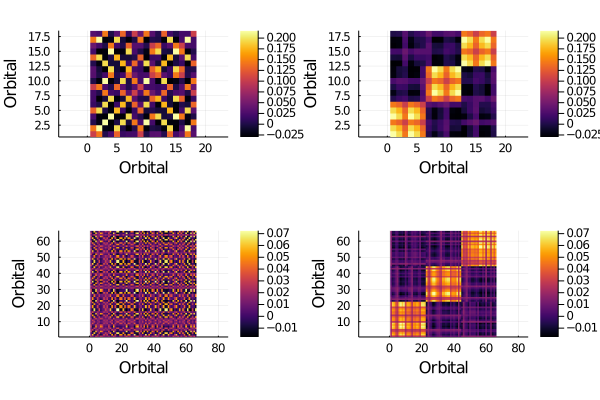

In [101]:
plot(p2, p3, p5, p6, layout = @layout [a  b ;c d])

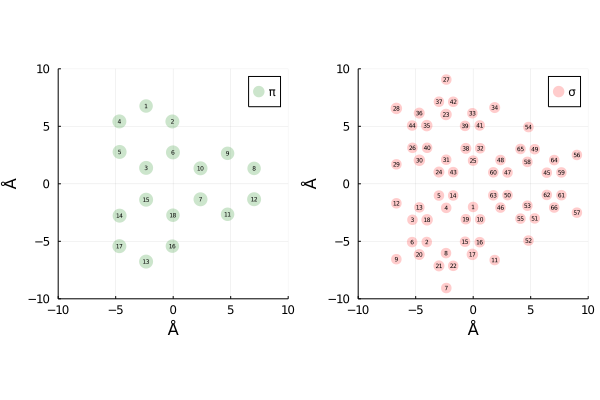

In [102]:
# 
# Now compare labelling
rx_act = Cact_sorted'*r1[1,:,:]*Cact_sorted;
ry_act = Cact_sorted'*r1[2,:,:]*Cact_sorted;
rx_sig = Csig_sorted'*r1[1,:,:]*Csig_sorted;
ry_sig = Csig_sorted'*r1[2,:,:]*Csig_sorted;
r2_act = Cact_sorted'*r2*Cact_sorted;
r2_sig = Csig_sorted'*r2*Csig_sorted;



p1 = scatter(diag(rx_act), diag(ry_act), aspect_ratio=:equal, 
    markersize=5*sqrt.(var_act), 
    labels="π",xlims=(-10,10),ylims=(-10,10),  legendfont = font(8),    
    markeralpha = 0.2,
    markercolor = :green,
    markerstrokewidth = 0,
)



[annotate!(rx_act[i,i],ry_act[i,i],i, font(4)) for i in 1:size(rx_act,1)]

p2 = scatter(diag(rx_sig), diag(ry_sig), aspect_ratio=:equal, 
    markersize=5*sqrt.(var_sig), 
    labels="σ",xlims=(-10,10),ylims=(-10,10),     
    markeralpha = 0.2,
    markercolor = :red,
    markerstrokewidth = 0,
    lw = 1
)

[annotate!(rx_sig[i,i],ry_sig[i,i],i, font(4)) for i in 1:size(rx_sig,1)]

plot(p1, p2, layout = @layout [a  b]
)
xlabel!("Å")
ylabel!("Å")

# 
# x and y axes are in units of Å. Each point corresponds to the mean position of the orbital, and the marker size 
# is 2*log(<r⋅r>). Thus, larger dots are more diffuse.

In [103]:
#
# Build Integrals
ints = FermiCG.pyscf_build_ints(mol, Cact_sorted, 2.0*Cocc*Cocc');
@printf(" Ecore: %12.8f", ints.h0)

 Ecore: -647.52657385

In [104]:
#
# Define the clusters. These are tuples of orbital ranges.
clusters    = [(1:6), (7:12), (13:18)]

#
# Define the reference fock sectors. These are tuples of α, β electron counts.
# For the target clustering where we have 3 "benzene's", we'll have 6 electrons in each cluster.
init_fspace = [(3, 3),(3, 3),(3, 3)]

na = sum([i[1] for i in init_fspace]);
nb = sum([i[2] for i in init_fspace]);
ints.h0


-647.5265738468793

In [105]:
# define clusters
clusters = [Cluster(i,collect(clusters[i])) for i = 1:length(clusters)]
display(clusters)

rdm1 = zeros(size(ints.h1))

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints, clusters, init_fspace, rdm1,
                                        max_iter_oo=40, verbose=0, gconv=1e-6, method="bfgs");


3-element Array{Cluster,1}:
 Cluster(1, [1, 2, 3, 4, 5, 6])
 Cluster(2, [7, 8, 9, 10, 11, 12])
 Cluster(3, [13, 14, 15, 16, 17, 18])

 ooCMF Iter:    1 Total= -680.485734319727 Active= -32.959160472847 G=     5.31e-01
 ooCMF Iter:    2 Total= -680.565576412284 Active= -33.039002565405 G=     1.54e-01
 ooCMF Iter:    3 Total= -680.571211810736 Active= -33.044637963857 G=     4.29e-02
 ooCMF Iter:    4 Total= -680.571713287756 Active= -33.045139440876 G=     2.00e-02
 ooCMF Iter:    5 Total= -680.571884679851 Active= -33.045310832972 G=     1.60e-02
 ooCMF Iter:    6 Total= -680.572036088024 Active= -33.045462241145 G=     9.76e-03
 ooCMF Iter:    7 Total= -680.572060024596 Active= -33.045486177716 G=     2.13e-03
 ooCMF Iter:    8 Total= -680.572061321181 Active= -33.045487474301 G=     1.06e-03
 ooCMF Iter:    9 Total= -680.572061948092 Active= -33.045488101213 G=     6.85e-04
 ooCMF Iter:   10 Total= -680.572062183876 Active= -33.045488336997 G=     4.92e-04
 ooCMF Iter:   11 Total= -680.572062258363 Active= -33.045488411484 G=     9.78e-05
 ooCMF Iter:   12 Total= -680.572062265949 Active= -33.045488419070 G=     5

 * Status: success

 * Candidate solution
    Final objective value:     -6.805721e+02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.01e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.83e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.06e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.02e-14 ≰ 0.0e+00
    |g(x)|                 = 1.00e-06 ≤ 1.0e-06

 * Work counters
    Seconds run:   57  (vs limit Inf)
    Iterations:    15
    f(x) calls:    36
    ∇f(x) calls:   36


 ooCMF Iter:   16 Total= -680.572062267132 Active= -33.045488420253 G=     3.87e-06
*ooCMF -680.57206227 


In [106]:
# Save molden file and rotate integrals
FermiCG.pyscf_write_molden(mol,Cact_sorted*U,filename="cmf.molden");
ints = FermiCG.orbital_rotation(ints,U);

In [107]:

max_roots = 100

#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=1, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);

IDX001:DIM4096:001|002|003|004|005|006|
 Number of embedded electrons a,b: 12.000000 12.000000 FCIProblem:: #Orbs = 6   #α = 0  #β = 0  Dimension: 1        
   State    1 Energy:   0.00000000 -647.52657385
 FCIProblem:: #Orbs = 6   #α = 0  #β = 1  Dimension: 6        
   State    1 Energy:  -1.84463625 -649.37121009
   State    2 Energy:  -1.71865107 -649.24522492
   State    3 Energy:  -1.70603805 -649.23261189
   State    4 Energy:  -1.45483842 -648.98141227
   State    5 Energy:  -1.43363124 -648.96020508
   State    6 Energy:  -1.27356499 -648.80013884
 FCIProblem:: #Orbs = 6   #α = 0  #β = 2  Dimension: 15       
   State    1 Energy:  -3.34956333 -650.87613718
   State    2 Energy:  -3.33952429 -650.86609814
   State    3 Energy:  -3.17069965 -650.69727350
   State    4 Energy:  -3.04504502 -650.57161886
   State    5 Energy:  -3.02528403 -650.55185787
   State    6 Energy:  -2.96804892 -650.49462277
   State    7 Energy:  -2.95216023 -650.47873408
   State    8 Energy:  -2.88173

   State   63 Energy:  -4.55438563 -652.08095947
   State   64 Energy:  -4.55148964 -652.07806349
   State   65 Energy:  -4.54382464 -652.07039848
   State   66 Energy:  -4.54251583 -652.06908968
   State   67 Energy:  -4.52508726 -652.05166111
   State   68 Energy:  -4.51207438 -652.03864822
   State   69 Energy:  -4.51056293 -652.03713678
   State   70 Energy:  -4.50284486 -652.02941870
   State   71 Energy:  -4.48588848 -652.01246233
   State   72 Energy:  -4.48475176 -652.01132561
   State   73 Energy:  -4.47070409 -651.99727794
   State   74 Energy:  -4.46327681 -651.98985065
   State   75 Energy:  -4.40877938 -651.93535322
   State   76 Energy:  -4.40409444 -651.93066828
   State   77 Energy:  -4.40283073 -651.92940457
   State   78 Energy:  -4.40049924 -651.92707309
   State   79 Energy:  -4.37982016 -651.90639401
   State   80 Energy:  -4.37832901 -651.90490285
   State   81 Energy:  -4.37171308 -651.89828692
   State   82 Energy:  -4.36716658 -651.89374042
   State   83 Energy

   State   79 Energy:  -3.34518019 -650.87175404
   State   80 Energy:  -3.30064910 -650.82722295
   State   81 Energy:  -3.29172235 -650.81829620
   State   82 Energy:  -3.25661728 -650.78319113
   State   83 Energy:  -3.25436163 -650.78093548
   State   84 Energy:  -3.17447171 -650.70104556
   State   85 Energy:  -3.15002857 -650.67660242
   State   86 Energy:  -3.09236063 -650.61893448
   State   87 Energy:  -3.07798136 -650.60455521
   State   88 Energy:  -3.03975502 -650.56632887
   State   89 Energy:  -2.98939878 -650.51597263
   State   90 Energy:  -2.98295594 -650.50952979
 FCIProblem:: #Orbs = 6   #α = 2  #β = 2  Dimension: 225      
   State    1 Energy:  -5.52632794 -653.05290178
   State    2 Energy:  -5.49447589 -653.02104974
   State    3 Energy:  -5.49159961 -653.01817346
   State    4 Energy:  -5.47171344 -652.99828728
   State    5 Energy:  -5.42170348 -652.94827732
   State    6 Energy:  -5.42122506 -652.94779891
   State    7 Energy:  -5.27891336 -652.80548721
   Sta

   State   49 Energy:  -5.48865404 -653.01522788
   State   50 Energy:  -5.48728418 -653.01385803
   State   51 Energy:  -5.48536966 -653.01194350
   State   52 Energy:  -5.47566064 -653.00223448
   State   53 Energy:  -5.47054965 -652.99712350
   State   54 Energy:  -5.46238216 -652.98895601
   State   55 Energy:  -5.46206562 -652.98863946
   State   56 Energy:  -5.45199203 -652.97856588
   State   57 Energy:  -5.45159551 -652.97816935
   State   58 Energy:  -5.44403469 -652.97060854
   State   59 Energy:  -5.44245601 -652.96902985
   State   60 Energy:  -5.43923115 -652.96580500
   State   61 Energy:  -5.43650090 -652.96307475
   State   62 Energy:  -5.43267264 -652.95924649
   State   63 Energy:  -5.41986737 -652.94644121
   State   64 Energy:  -5.40077222 -652.92734607
   State   65 Energy:  -5.39171103 -652.91828488
   State   66 Energy:  -5.39034753 -652.91692137
   State   67 Energy:  -5.38501538 -652.91158923
   State   68 Energy:  -5.38218771 -652.90876156
   State   69 Energy

   State    1 Energy:  -5.52632794 -653.05290178
   State    2 Energy:  -5.42170348 -652.94827732
   State    3 Energy:  -5.42122506 -652.94779891
   State    4 Energy:  -5.27891336 -652.80548721
   State    5 Energy:  -5.27368872 -652.80026257
   State    6 Energy:  -5.27309664 -652.79967048
   State    7 Energy:  -5.25776483 -652.78433868
   State    8 Energy:  -5.19849098 -652.72506483
   State    9 Energy:  -5.19300513 -652.71957898
   State   10 Energy:  -5.17755221 -652.70412606
   State   11 Energy:  -5.17209024 -652.69866409
   State   12 Energy:  -5.11174948 -652.63832333
   State   13 Energy:  -5.10822345 -652.63479729
   State   14 Energy:  -5.10660399 -652.63317783
   State   15 Energy:  -5.08532868 -652.61190253
   State   16 Energy:  -5.08353086 -652.61010471
   State   17 Energy:  -5.07440136 -652.60097520
   State   18 Energy:  -5.04127485 -652.56784869
   State   19 Energy:  -5.04122314 -652.56779699
   State   20 Energy:  -5.01748955 -652.54406340
   State   21 Energy

   State    1 Energy:  -6.38846097 -653.91503482
   State    2 Energy:  -6.23132416 -653.75789801
   State    3 Energy:  -6.17804704 -653.70462089
   State    4 Energy:  -6.17215465 -653.69872849
   State    5 Energy:  -6.16869731 -653.69527116
   State    6 Energy:  -6.09571444 -653.62228829
   State    7 Energy:  -6.09301074 -653.61958459
   State    8 Energy:  -6.05019441 -653.57676826
   State    9 Energy:  -6.04153990 -653.56811374
   State   10 Energy:  -6.02493582 -653.55150967
   State   11 Energy:  -6.02161117 -653.54818501
   State   12 Energy:  -5.98788112 -653.51445497
   State   13 Energy:  -5.95100779 -653.47758164
   State   14 Energy:  -5.95020745 -653.47678130
   State   15 Energy:  -5.94821194 -653.47478579
   State   16 Energy:  -5.94540747 -653.47198132
   State   17 Energy:  -5.94184932 -653.46842316
   State   18 Energy:  -5.91215602 -653.43872987
   State   19 Energy:  -5.87634768 -653.40292153
   State   20 Energy:  -5.86187496 -653.38844880
   State   21 Energy

   State   76 Energy:  -4.34222071 -651.86879456
   State   77 Energy:  -4.32085739 -651.84743124
   State   78 Energy:  -4.31085255 -651.83742640
   State   79 Energy:  -4.31007567 -651.83664951
   State   80 Energy:  -4.30021908 -651.82679292
   State   81 Energy:  -4.29981334 -651.82638719
   State   82 Energy:  -4.29408010 -651.82065395
   State   83 Energy:  -4.29314400 -651.81971785
   State   84 Energy:  -4.27500252 -651.80157636
   State   85 Energy:  -4.24082358 -651.76739743
   State   86 Energy:  -4.22835711 -651.75493095
   State   87 Energy:  -4.21132416 -651.73789800
   State   88 Energy:  -4.20962685 -651.73620069
   State   89 Energy:  -4.20274045 -651.72931429
   State   90 Energy:  -4.20148199 -651.72805584
   State   91 Energy:  -4.18323162 -651.70980546
   State   92 Energy:  -4.16790378 -651.69447763
   State   93 Energy:  -4.16379788 -651.69037173
   State   94 Energy:  -4.14108741 -651.66766125
   State   95 Energy:  -4.13432683 -651.66090067
   State   96 Energy

   State   23 Energy:  -5.73030588 -653.25687972
   State   24 Energy:  -5.72536478 -653.25193863
   State   25 Energy:  -5.71418010 -653.24075395
   State   26 Energy:  -5.70148278 -653.22805663
   State   27 Energy:  -5.68144439 -653.20801824
   State   28 Energy:  -5.67403191 -653.20060576
   State   29 Energy:  -5.67238537 -653.19895921
   State   30 Energy:  -5.67203174 -653.19860559
   State   31 Energy:  -5.64976798 -653.17634182
   State   32 Energy:  -5.63623104 -653.16280489
   State   33 Energy:  -5.63585062 -653.16242447
   State   34 Energy:  -5.62919776 -653.15577161
   State   35 Energy:  -5.61375249 -653.14032634
   State   36 Energy:  -5.61160240 -653.13817625
   State   37 Energy:  -5.60843894 -653.13501279
   State   38 Energy:  -5.60547151 -653.13204536
   State   39 Energy:  -5.60544559 -653.13201943
   State   40 Energy:  -5.60254713 -653.12912097
   State   41 Energy:  -5.57690113 -653.10347498
   State   42 Energy:  -5.57367234 -653.10024619
   State   43 Energy

   State   58 Energy:  -4.79069233 -652.31726618
   State   59 Energy:  -4.79015714 -652.31673099
   State   60 Energy:  -4.77421350 -652.30078735
   State   61 Energy:  -4.75003670 -652.27661055
   State   62 Energy:  -4.74685590 -652.27342975
   State   63 Energy:  -4.72575608 -652.25232993
   State   64 Energy:  -4.72566283 -652.25223668
   State   65 Energy:  -4.71956166 -652.24613551
   State   66 Energy:  -4.71720384 -652.24377769
   State   67 Energy:  -4.71686702 -652.24344087
   State   68 Energy:  -4.69976937 -652.22634322
   State   69 Energy:  -4.69925025 -652.22582410
   State   70 Energy:  -4.68657128 -652.21314512
   State   71 Energy:  -4.68201769 -652.20859154
   State   72 Energy:  -4.67300537 -652.19957922
   State   73 Energy:  -4.67069353 -652.19726737
   State   74 Energy:  -4.67004242 -652.19661627
   State   75 Energy:  -4.66937705 -652.19595090
   State   76 Energy:  -4.66250383 -652.18907768
   State   77 Energy:  -4.65243585 -652.17900970
   State   78 Energy

   State   53 Energy:  -4.92309424 -652.44966809
   State   54 Energy:  -4.91678340 -652.44335724
   State   55 Energy:  -4.91555876 -652.44213261
   State   56 Energy:  -4.90271340 -652.42928725
   State   57 Energy:  -4.89639444 -652.42296829
   State   58 Energy:  -4.85640529 -652.38297913
   State   59 Energy:  -4.85337511 -652.37994895
   State   60 Energy:  -4.82434181 -652.35091566
   State   61 Energy:  -4.81705213 -652.34362598
   State   62 Energy:  -4.81465004 -652.34122389
   State   63 Energy:  -4.81290269 -652.33947654
   State   64 Energy:  -4.78295048 -652.30952432
   State   65 Energy:  -4.78028906 -652.30686290
   State   66 Energy:  -4.77638049 -652.30295434
   State   67 Energy:  -4.77187344 -652.29844729
   State   68 Energy:  -4.73617082 -652.26274466
   State   69 Energy:  -4.73279879 -652.25937263
   State   70 Energy:  -4.71775465 -652.24432850
   State   71 Energy:  -4.71541892 -652.24199276
   State   72 Energy:  -4.70220402 -652.22877787
   State   73 Energy

   State    4 Energy:  -5.20608724 -652.73266109
   State    5 Energy:  -5.20388246 -652.73045631
   State    6 Energy:  -5.01489874 -652.54147259
 FCIProblem:: #Orbs = 6   #α = 6  #β = 2  Dimension: 15       
   State    1 Energy:  -5.22196910 -652.74854295
   State    2 Energy:  -5.20742470 -652.73399855
   State    3 Energy:  -5.03858353 -652.56515737
   State    4 Energy:  -4.88165182 -652.40822567
   State    5 Energy:  -4.88075769 -652.40733154
   State    6 Energy:  -4.80713529 -652.33370914
   State    7 Energy:  -4.79762511 -652.32419896
   State    8 Energy:  -4.72575608 -652.25232993
   State    9 Energy:  -4.72566283 -652.25223668
   State   10 Energy:  -4.63159130 -652.15816515
   State   11 Energy:  -4.53875788 -652.06533173
   State   12 Energy:  -4.52515127 -652.05172511
   State   13 Energy:  -4.43305920 -651.95963305
   State   14 Energy:  -4.29408010 -651.82065395
   State   15 Energy:  -4.29314400 -651.81971785
 FCIProblem:: #Orbs = 6   #α = 6  #β = 3  Dimension: 20

   State   68 Energy:  -3.52329002 -651.04986386
   State   69 Energy:  -3.50124718 -651.02782103
   State   70 Energy:  -3.48595912 -651.01253297
   State   71 Energy:  -3.47543092 -651.00200476
   State   72 Energy:  -3.44820402 -650.97477787
   State   73 Energy:  -3.43064007 -650.95721392
   State   74 Energy:  -3.42730419 -650.95387803
   State   75 Energy:  -3.41159772 -650.93817157
   State   76 Energy:  -3.40094406 -650.92751791
   State   77 Energy:  -3.36606114 -650.89263499
   State   78 Energy:  -3.35715178 -650.88372562
   State   79 Energy:  -3.34518308 -650.87175693
   State   80 Energy:  -3.30064919 -650.82722303
   State   81 Energy:  -3.29172650 -650.81830034
   State   82 Energy:  -3.25661954 -650.78319339
   State   83 Energy:  -3.25436324 -650.78093708
   State   84 Energy:  -3.17447342 -650.70104727
   State   85 Energy:  -3.15003075 -650.67660460
   State   86 Energy:  -3.09236277 -650.61893661
   State   87 Energy:  -3.07798312 -650.60455697
   State   88 Energy

   State    1 Energy:  -3.34957107 -650.87614492
   State    2 Energy:  -3.33952546 -650.86609931
   State    3 Energy:  -3.17070329 -650.69727714
   State    4 Energy:  -3.04504631 -650.57162015
   State    5 Energy:  -3.02528894 -650.55186279
   State    6 Energy:  -2.96805183 -650.49462568
   State    7 Energy:  -2.95216191 -650.47873576
   State    8 Energy:  -2.88174084 -650.40831469
   State    9 Energy:  -2.88140767 -650.40798152
   State   10 Energy:  -2.80365773 -650.33023158
   State   11 Energy:  -2.71287647 -650.23945031
   State   12 Energy:  -2.69996778 -650.22654163
   State   13 Energy:  -2.61338645 -650.13996030
   State   14 Energy:  -2.49983677 -650.02641062
   State   15 Energy:  -2.48373782 -650.01031166
 FCIProblem:: #Orbs = 6   #α = 2  #β = 1  Dimension: 90       
   State    1 Energy:  -4.61708823 -652.14366208
   State    2 Energy:  -4.61440810 -652.14098194
   State    3 Energy:  -4.58062020 -652.10719405
   State    4 Energy:  -4.50219981 -652.02877365
   Sta

   State    1 Energy:  -6.09707420 -653.62364805
   State    2 Energy:  -6.09445432 -653.62102817
   State    3 Energy:  -5.98225082 -653.50882466
   State    4 Energy:  -5.90760496 -653.43417880
   State    5 Energy:  -5.89774823 -653.42432208
   State    6 Energy:  -5.87145034 -653.39802418
   State    7 Energy:  -5.87113990 -653.39771375
   State    8 Energy:  -5.82575263 -653.35232648
   State    9 Energy:  -5.82217928 -653.34875313
   State   10 Energy:  -5.81539053 -653.34196438
   State   11 Energy:  -5.80982209 -653.33639594
   State   12 Energy:  -5.80004815 -653.32662199
   State   13 Energy:  -5.79623326 -653.32280711
   State   14 Energy:  -5.77520036 -653.30177420
   State   15 Energy:  -5.76149764 -653.28807149
   State   16 Energy:  -5.74722807 -653.27380192
   State   17 Energy:  -5.74100839 -653.26758224
   State   18 Energy:  -5.71280898 -653.23938283
   State   19 Energy:  -5.70962132 -653.23619517
   State   20 Energy:  -5.67781821 -653.20439205
   State   21 Energy

 FCIProblem:: #Orbs = 6   #α = 2  #β = 6  Dimension: 15       
   State    1 Energy:  -5.22197243 -652.74854628
   State    2 Energy:  -5.20743327 -652.73400712
   State    3 Energy:  -5.03858906 -652.56516291
   State    4 Energy:  -4.88165874 -652.40823259
   State    5 Energy:  -4.88075979 -652.40733364
   State    6 Energy:  -4.80713981 -652.33371366
   State    7 Energy:  -4.79762858 -652.32420243
   State    8 Energy:  -4.72576034 -652.25233419
   State    9 Energy:  -4.72566806 -652.25224191
   State   10 Energy:  -4.63159501 -652.15816886
   State   11 Energy:  -4.53875957 -652.06533341
   State   12 Energy:  -4.52515627 -652.05173012
   State   13 Energy:  -4.43306219 -651.95963603
   State   14 Energy:  -4.29408411 -651.82065796
   State   15 Energy:  -4.29314419 -651.81971804
 FCIProblem:: #Orbs = 6   #α = 3  #β = 0  Dimension: 20       
   State    1 Energy:  -4.58062020 -652.10719405
   State    2 Energy:  -4.33315140 -651.85972525
   State    3 Energy:  -4.29454908 -651.8

   State    1 Energy:  -6.38846998 -653.91504382
   State    2 Energy:  -6.23133087 -653.75790472
   State    3 Energy:  -6.17805488 -653.70462873
   State    4 Energy:  -6.17216211 -653.69873596
   State    5 Energy:  -6.16870578 -653.69527963
   State    6 Energy:  -6.09572088 -653.62229473
   State    7 Energy:  -6.09301906 -653.61959290
   State    8 Energy:  -6.05019741 -653.57677126
   State    9 Energy:  -6.04155068 -653.56812452
   State   10 Energy:  -6.02494435 -653.55151819
   State   11 Energy:  -6.02161734 -653.54819118
   State   12 Energy:  -5.98788870 -653.51446255
   State   13 Energy:  -5.95101735 -653.47759119
   State   14 Energy:  -5.95021510 -653.47678895
   State   15 Energy:  -5.94821540 -653.47478925
   State   16 Energy:  -5.94541309 -653.47198694
   State   17 Energy:  -5.94185813 -653.46843197
   State   18 Energy:  -5.91216265 -653.43873650
   State   19 Energy:  -5.87635389 -653.40292774
   State   20 Energy:  -5.86188122 -653.38845507
   State   21 Energy

   State   57 Energy:  -4.54991844 -652.07649229
   State   58 Energy:  -4.53875957 -652.06533341
   State   59 Energy:  -4.52515627 -652.05173012
   State   60 Energy:  -4.50584428 -652.03241813
   State   61 Energy:  -4.50292781 -652.02950166
   State   62 Energy:  -4.50242427 -652.02899812
   State   63 Energy:  -4.49808996 -652.02466380
   State   64 Energy:  -4.49583850 -652.02241235
   State   65 Energy:  -4.48800919 -652.01458304
   State   66 Energy:  -4.45883755 -651.98541140
   State   67 Energy:  -4.45879698 -651.98537082
   State   68 Energy:  -4.44884990 -651.97542374
   State   69 Energy:  -4.43660082 -651.96317467
   State   70 Energy:  -4.43306219 -651.95963603
   State   71 Energy:  -4.43039080 -651.95696465
   State   72 Energy:  -4.42638312 -651.95295697
   State   73 Energy:  -4.40529797 -651.93187182
   State   74 Energy:  -4.40419066 -651.93076450
   State   75 Energy:  -4.34479869 -651.87137254
   State   76 Energy:  -4.34222498 -651.86879883
   State   77 Energy

   State   35 Energy:  -5.61375841 -653.14033225
   State   36 Energy:  -5.61160695 -653.13818080
   State   37 Energy:  -5.60844457 -653.13501842
   State   38 Energy:  -5.60547856 -653.13205241
   State   39 Energy:  -5.60545221 -653.13202606
   State   40 Energy:  -5.60255431 -653.12912816
   State   41 Energy:  -5.57690656 -653.10348040
   State   42 Energy:  -5.57367834 -653.10025218
   State   43 Energy:  -5.57143063 -653.09800448
   State   44 Energy:  -5.52422720 -653.05080105
   State   45 Energy:  -5.50528401 -653.03185786
   State   46 Energy:  -5.50396766 -653.03054151
   State   47 Energy:  -5.50226247 -653.02883632
   State   48 Energy:  -5.49718997 -653.02376382
   State   49 Energy:  -5.48866020 -653.01523405
   State   50 Energy:  -5.48729069 -653.01386453
   State   51 Energy:  -5.48537483 -653.01194868
   State   52 Energy:  -5.47566430 -653.00223815
   State   53 Energy:  -5.47055855 -652.99713240
   State   54 Energy:  -5.46238687 -652.98896072
   State   55 Energy

   State   84 Energy:  -4.63159501 -652.15816886
   State   85 Energy:  -4.61523518 -652.14180902
   State   86 Energy:  -4.61027019 -652.13684404
   State   87 Energy:  -4.60041731 -652.12699116
   State   88 Energy:  -4.59852901 -652.12510286
   State   89 Energy:  -4.56655998 -652.09313383
   State   90 Energy:  -4.56483923 -652.09141307
   State   91 Energy:  -4.56223177 -652.08880562
   State   92 Energy:  -4.55991699 -652.08649084
   State   93 Energy:  -4.55592417 -652.08249802
   State   94 Energy:  -4.55380740 -652.08038125
   State   95 Energy:  -4.55071391 -652.07728776
   State   96 Energy:  -4.54991844 -652.07649229
   State   97 Energy:  -4.54446790 -652.07104175
   State   98 Energy:  -4.53990429 -652.06647814
   State   99 Energy:  -4.53875957 -652.06533341
   State  100 Energy:  -4.52515627 -652.05173012
 FCIProblem:: #Orbs = 6   #α = 4  #β = 5  Dimension: 90       
   State    1 Energy:  -4.61243056 -652.13900441
   State    2 Energy:  -4.61067445 -652.13724830
   Sta

   State   80 Energy:  -4.52813564 -652.05470949
   State   81 Energy:  -4.52435854 -652.05093239
   State   82 Energy:  -4.51867305 -652.04524690
   State   83 Energy:  -4.51402990 -652.04060375
   State   84 Energy:  -4.47071512 -651.99728897
   State   85 Energy:  -4.44081990 -651.96739375
   State   86 Energy:  -4.35049097 -651.87706482
   State   87 Energy:  -4.34614740 -651.87272125
   State   88 Energy:  -4.27262640 -651.79920025
   State   89 Energy:  -4.24872936 -651.77530320
   State   90 Energy:  -4.24806975 -651.77464360
 FCIProblem:: #Orbs = 6   #α = 5  #β = 3  Dimension: 120      
   State    1 Energy:  -5.53232729 -653.05890113
   State    2 Energy:  -5.38563725 -652.91221110
   State    3 Energy:  -5.38467092 -652.91124477
   State    4 Energy:  -5.26961688 -652.79619072
   State    5 Energy:  -5.25887288 -652.78544673
   State    6 Energy:  -5.22197243 -652.74854628
   State    7 Energy:  -5.20743327 -652.73400712
   State    8 Energy:  -5.17705605 -652.70362990
   Sta

   State    1 Energy:  -5.22197243 -652.74854628
   State    2 Energy:  -5.20743327 -652.73400712
   State    3 Energy:  -5.03858906 -652.56516291
   State    4 Energy:  -4.88165874 -652.40823259
   State    5 Energy:  -4.88075979 -652.40733364
   State    6 Energy:  -4.80713981 -652.33371366
   State    7 Energy:  -4.79762858 -652.32420243
   State    8 Energy:  -4.72576034 -652.25233419
   State    9 Energy:  -4.72566806 -652.25224191
   State   10 Energy:  -4.63159501 -652.15816886
   State   11 Energy:  -4.53875957 -652.06533341
   State   12 Energy:  -4.52515627 -652.05173012
   State   13 Energy:  -4.43306219 -651.95963603
   State   14 Energy:  -4.29408411 -651.82065796
   State   15 Energy:  -4.29314419 -651.81971804
 FCIProblem:: #Orbs = 6   #α = 6  #β = 3  Dimension: 20       
   State    1 Energy:  -4.53410325 -652.06067709
   State    2 Energy:  -4.26307562 -651.78964947
   State    3 Energy:  -4.22360408 -651.75017792
   State    4 Energy:  -4.18100789 -651.70758173
   Sta

   State    1 Energy:  -5.52632794 -653.05290178
   State    2 Energy:  -5.42170348 -652.94827732
   State    3 Energy:  -5.42122506 -652.94779891
   State    4 Energy:  -5.27891336 -652.80548721
   State    5 Energy:  -5.27368872 -652.80026257
   State    6 Energy:  -5.27309664 -652.79967048
   State    7 Energy:  -5.25776483 -652.78433868
   State    8 Energy:  -5.19849098 -652.72506483
   State    9 Energy:  -5.19300513 -652.71957898
   State   10 Energy:  -5.17755221 -652.70412606
   State   11 Energy:  -5.17209024 -652.69866409
   State   12 Energy:  -5.11174948 -652.63832333
   State   13 Energy:  -5.10822345 -652.63479729
   State   14 Energy:  -5.10660399 -652.63317783
   State   15 Energy:  -5.08532868 -652.61190253
   State   16 Energy:  -5.08353086 -652.61010471
   State   17 Energy:  -5.07440136 -652.60097520
   State   18 Energy:  -5.04127485 -652.56784869
   State   19 Energy:  -5.04122314 -652.56779699
   State   20 Energy:  -5.01748955 -652.54406340
   State   21 Energy

   State    1 Energy:  -4.61708014 -652.14365398
   State    2 Energy:  -4.61440371 -652.14097755
   State    3 Energy:  -4.58061432 -652.10718817
   State    4 Energy:  -4.50219353 -652.02876738
   State    5 Energy:  -4.50054084 -652.02711469
   State    6 Energy:  -4.40921672 -651.93579056
   State    7 Energy:  -4.36068414 -651.88725799
   State    8 Energy:  -4.33314751 -651.85972136
   State    9 Energy:  -4.32089998 -651.84747383
   State   10 Energy:  -4.31997235 -651.84654619
   State   11 Energy:  -4.29454733 -651.82112118
   State   12 Energy:  -4.29454410 -651.82111795
   State   13 Energy:  -4.28473930 -651.81131315
   State   14 Energy:  -4.25159300 -651.77816685
   State   15 Energy:  -4.24864673 -651.77522058
   State   16 Energy:  -4.21149915 -651.73807299
   State   17 Energy:  -4.20556973 -651.73214357
   State   18 Energy:  -4.15270285 -651.67927670
   State   19 Energy:  -4.15087378 -651.67744763
   State   20 Energy:  -4.14941505 -651.67598890
   State   21 Energy

   State   47 Energy:  -5.44807322 -652.97464707
   State   48 Energy:  -5.44704622 -652.97362007
   State   49 Energy:  -5.44646286 -652.97303670
   State   50 Energy:  -5.43138442 -652.95795827
   State   51 Energy:  -5.43023143 -652.95680528
   State   52 Energy:  -5.42932672 -652.95590057
   State   53 Energy:  -5.42773916 -652.95431300
   State   54 Energy:  -5.41397249 -652.94054634
   State   55 Energy:  -5.39906778 -652.92564162
   State   56 Energy:  -5.39351154 -652.92008539
   State   57 Energy:  -5.39030584 -652.91687969
   State   58 Energy:  -5.37993175 -652.90650560
   State   59 Energy:  -5.35665647 -652.88323031
   State   60 Energy:  -5.35559463 -652.88216848
   State   61 Energy:  -5.35526768 -652.88184153
   State   62 Energy:  -5.35037748 -652.87695132
   State   63 Energy:  -5.35013116 -652.87670500
   State   64 Energy:  -5.34763496 -652.87420881
   State   65 Energy:  -5.34067151 -652.86724536
   State   66 Energy:  -5.33015804 -652.85673189
   State   67 Energy

   State    1 Energy:  -4.58061432 -652.10718817
   State    2 Energy:  -4.33314751 -651.85972136
   State    3 Energy:  -4.29454410 -651.82111795
   State    4 Energy:  -4.25159300 -651.77816685
   State    5 Energy:  -4.24864673 -651.77522058
   State    6 Energy:  -4.15270285 -651.67927670
   State    7 Energy:  -4.14102703 -651.66760088
   State    8 Energy:  -4.04968486 -651.57625871
   State    9 Energy:  -4.04767896 -651.57425280
   State   10 Energy:  -3.95924227 -651.48581611
   State   11 Energy:  -3.89312645 -651.41970029
   State   12 Energy:  -3.87258532 -651.39915917
   State   13 Energy:  -3.87129312 -651.39786697
   State   14 Energy:  -3.76603078 -651.29260463
   State   15 Energy:  -3.75332893 -651.27990278
   State   16 Energy:  -3.71887329 -651.24544714
   State   17 Energy:  -3.70390643 -651.23048028
   State   18 Energy:  -3.65531780 -651.18189165
   State   19 Energy:  -3.65254425 -651.17911810
   State   20 Energy:  -3.44820320 -650.97477705
 FCIProblem:: #Orbs 

   State    1 Energy:  -6.38846097 -653.91503482
   State    2 Energy:  -6.23132416 -653.75789801
   State    3 Energy:  -6.17804704 -653.70462089
   State    4 Energy:  -6.17215465 -653.69872849
   State    5 Energy:  -6.16869731 -653.69527116
   State    6 Energy:  -6.09571444 -653.62228829
   State    7 Energy:  -6.09301074 -653.61958459
   State    8 Energy:  -6.05019441 -653.57676826
   State    9 Energy:  -6.04153990 -653.56811374
   State   10 Energy:  -6.02493582 -653.55150967
   State   11 Energy:  -6.02161117 -653.54818501
   State   12 Energy:  -5.98788112 -653.51445497
   State   13 Energy:  -5.95100779 -653.47758164
   State   14 Energy:  -5.95020745 -653.47678130
   State   15 Energy:  -5.94821194 -653.47478579
   State   16 Energy:  -5.94540747 -653.47198132
   State   17 Energy:  -5.94184932 -653.46842316
   State   18 Energy:  -5.91215602 -653.43872987
   State   19 Energy:  -5.87634768 -653.40292153
   State   20 Energy:  -5.86187496 -653.38844880
   State   21 Energy

   State   65 Energy:  -4.48800184 -652.01457569
   State   66 Energy:  -4.45883381 -651.98540766
   State   67 Energy:  -4.45879268 -651.98536653
   State   68 Energy:  -4.44884437 -651.97541821
   State   69 Energy:  -4.43659699 -651.96317084
   State   70 Energy:  -4.43305920 -651.95963305
   State   71 Energy:  -4.43038701 -651.95696086
   State   72 Energy:  -4.42637844 -651.95295229
   State   73 Energy:  -4.40529424 -651.93186809
   State   74 Energy:  -4.40418727 -651.93076112
   State   75 Energy:  -4.34479451 -651.87136836
   State   76 Energy:  -4.34222071 -651.86879456
   State   77 Energy:  -4.32085739 -651.84743124
   State   78 Energy:  -4.31085255 -651.83742640
   State   79 Energy:  -4.31007567 -651.83664951
   State   80 Energy:  -4.30021908 -651.82679292
   State   81 Energy:  -4.29981334 -651.82638719
   State   82 Energy:  -4.29408010 -651.82065395
   State   83 Energy:  -4.29314400 -651.81971785
   State   84 Energy:  -4.27500252 -651.80157636
   State   85 Energy

   State   58 Energy:  -5.44403469 -652.97060854
   State   59 Energy:  -5.44245601 -652.96902985
   State   60 Energy:  -5.43923115 -652.96580500
   State   61 Energy:  -5.43650090 -652.96307475
   State   62 Energy:  -5.43267264 -652.95924649
   State   63 Energy:  -5.41986737 -652.94644121
   State   64 Energy:  -5.40077222 -652.92734607
   State   65 Energy:  -5.39171103 -652.91828488
   State   66 Energy:  -5.39034753 -652.91692137
   State   67 Energy:  -5.38501538 -652.91158923
   State   68 Energy:  -5.38218771 -652.90876156
   State   69 Energy:  -5.37395063 -652.90052447
   State   70 Energy:  -5.37208067 -652.89865452
   State   71 Energy:  -5.36609463 -652.89266848
   State   72 Energy:  -5.35519045 -652.88176430
   State   73 Energy:  -5.35472941 -652.88130326
   State   74 Energy:  -5.34535596 -652.87192981
   State   75 Energy:  -5.33978981 -652.86636365
   State   76 Energy:  -5.33628147 -652.86285531
   State   77 Energy:  -5.33500839 -652.86158224
   State   78 Energy

   State   74 Energy:  -4.67004242 -652.19661627
   State   75 Energy:  -4.66937705 -652.19595090
   State   76 Energy:  -4.66250383 -652.18907768
   State   77 Energy:  -4.65243585 -652.17900970
   State   78 Energy:  -4.65189002 -652.17846387
   State   79 Energy:  -4.64985521 -652.17642905
   State   80 Energy:  -4.64763980 -652.17421364
   State   81 Energy:  -4.63595622 -652.16253007
   State   82 Energy:  -4.63516330 -652.16173715
   State   83 Energy:  -4.63249815 -652.15907200
   State   84 Energy:  -4.63159130 -652.15816515
   State   85 Energy:  -4.61523066 -652.14180451
   State   86 Energy:  -4.61026609 -652.13683993
   State   87 Energy:  -4.60041259 -652.12698644
   State   88 Energy:  -4.59852457 -652.12509841
   State   89 Energy:  -4.56655521 -652.09312906
   State   90 Energy:  -4.56483460 -652.09140845
   State   91 Energy:  -4.56222642 -652.08880027
   State   92 Energy:  -4.55991508 -652.08648893
   State   93 Energy:  -4.55592135 -652.08249519
   State   94 Energy

   State    8 Energy:  -5.63463629 -653.16121014
   State    9 Energy:  -5.63102765 -653.15760149
   State   10 Energy:  -5.57007122 -653.09664506
   State   11 Energy:  -5.56951212 -653.09608596
   State   12 Energy:  -5.54403804 -653.07061189
   State   13 Energy:  -5.53547997 -653.06205382
   State   14 Energy:  -5.50370088 -653.03027472
   State   15 Energy:  -5.50342007 -653.02999392
   State   16 Energy:  -5.49157761 -653.01815145
   State   17 Energy:  -5.48897604 -653.01554989
   State   18 Energy:  -5.48526573 -653.01183957
   State   19 Energy:  -5.42375040 -652.95032424
   State   20 Energy:  -5.36114919 -652.88772304
   State   21 Energy:  -5.35134122 -652.87791506
   State   22 Energy:  -5.33634108 -652.86291493
   State   23 Energy:  -5.33478041 -652.86135426
   State   24 Energy:  -5.32344144 -652.85001529
   State   25 Energy:  -5.32325685 -652.84983070
   State   26 Energy:  -5.32114877 -652.84772262
   State   27 Energy:  -5.27293497 -652.79950882
   State   28 Energy

   State   52 Energy:  -3.65104366 -651.17761751
   State   53 Energy:  -3.64987655 -651.17645040
   State   54 Energy:  -3.64872152 -651.17529536
   State   55 Energy:  -3.60126167 -651.12783551
   State   56 Energy:  -3.59523620 -651.12181004
   State   57 Energy:  -3.59338542 -651.11995927
   State   58 Energy:  -3.58474748 -651.11132133
   State   59 Energy:  -3.57977862 -651.10635247
   State   60 Energy:  -3.57635789 -651.10293173
   State   61 Energy:  -3.54325044 -651.06982429
   State   62 Energy:  -3.54182116 -651.06839500
   State   63 Energy:  -3.53938042 -651.06595427
   State   64 Energy:  -3.53809417 -651.06466802
   State   65 Energy:  -3.49870155 -651.02527540
   State   66 Energy:  -3.46949348 -650.99606733
   State   67 Energy:  -3.46650787 -650.99308172
   State   68 Energy:  -3.40996843 -650.93654228
   State   69 Energy:  -3.40282980 -650.92940364
   State   70 Energy:  -3.39877499 -650.92534884
   State   71 Energy:  -3.37747834 -650.90405219
   State   72 Energy

In [160]:
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);


 Remove duplicates
 Number of terms reduced from   327 to   159


In [161]:
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

In [162]:
p_spaces = Vector{FermiCG.ClusterSubspace}()
q_spaces = Vector{FermiCG.ClusterSubspace}()

# define p spaces
for ci in clusters
    tss = FermiCG.ClusterSubspace(ci)
    tss[init_fspace[ci.idx]] = 1:1
    push!(p_spaces, tss)
end

# define q spaces
for tssp in p_spaces
    tss = FermiCG.get_ortho_compliment(tssp, cluster_bases[tssp.cluster.idx])
    push!(q_spaces, tss)
end

println(" ================= Cluster P Spaces ===================")
display.(p_spaces);
println(" ================= Cluster Q Spaces ===================")
display.(q_spaces);

 ================= Cluster P Spaces ===================
 Subspace for Cluster:    1 : IDX001:DIM4096:001|002|003|004|005|006|
      (3, 3)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    2 : IDX002:DIM4096:007|008|009|010|011|012|
      (3, 3)   Range:    1 → 1    Dim    1
 Subspace for Cluster:    3 : IDX003:DIM4096:013|014|015|016|017|018|
      (3, 3)   Range:    1 → 1    Dim    1
 ================= Cluster Q Spaces ===================
 Subspace for Cluster:    1 : IDX001:DIM4096:001|002|003|004|005|006|
      (0, 0)   Range:    1 → 1    Dim    1
      (3, 6)   Range:    1 → 20   Dim   20
      (4, 4)   Range:    1 → 100  Dim  100
      (1, 0)   Range:    1 → 6    Dim    6
      (3, 1)   Range:    1 → 100  Dim  100
      (4, 5)   Range:    1 → 90   Dim   90
      (4, 0)   Range:    1 → 15   Dim   15
      (2, 4)   Range:    1 → 100  Dim  100
      (6, 5)   Range:    1 → 6    Dim    6
      (1, 2)   Range:    1 → 90   Dim   90
      (5, 1)   Range:    1 → 36   Dim   36
      

In [163]:
nroots = 1
ref_vector = FermiCG.TuckerState(clusters, p_spaces, q_spaces, 9, 9)
#
# initialize with eye
FermiCG.set_vector!(ref_vector, Matrix(1.0I, length(ref_vector),nroots))

ref  = FermiCG.CompressedTuckerState(ref_vector, thresh=-1);


In [164]:
# Solve for reference state (should be CMF energy)
@time e_ref, ref = FermiCG.tucker_ci_solve(ref, cluster_ops, clustered_ham, tol=1e-5);
display(ref)

 Solve CI with # variables = 1
 Iter:   1 SS: 1    E:  -33.04548842*  R: 0.0e+00* 
 Memory used by cache: 10176.0
  0.464384 seconds (410.77 k allocations: 21.875 MiB)

 --------------------------------------------------
 ---------- # Fockspaces -------------------:     1  
 ---------- # Configs    -------------------:     1  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # configs (full)    (α,β)...            
 -------             --------- --------- ----------          
 1.000                                   ( 3,3 )( 3,3 )( 3,3 )
     1.000           1         1             1:1    1:1    1:1
 ---------                               ----------          
 --------------------------------------------------



In [165]:
# 
# Compute CMF Mean-field Zeroth-Order Hamiltonian
# display(typeof(cluster_ops))
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db);

In [123]:
@time fois_vec  = FermiCG.build_compressed_1st_order_state(ref, cluster_ops, clustered_ham, nbody=4, thresh=1e-6)
pt_vec = FermiCG.hylleraas_compressed_mp2(fois_vec, ref, cluster_ops, clustered_ham;
                                                 tol=1e-6, nbody=4);

 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4


LoadError: InterruptException:

In [166]:
# Solve for target
@time e_var, v_var = FermiCG.solve_for_compressed_space(ref, cluster_ops, clustered_ham, 
    max_iter = 4,
    nbody=4, 
    H0="H",
    thresh_foi=1e-8, 
    thresh_pt =1e-6, 
    thresh_var=1e-4, 
    do_pt = true,
    tol_ci=1e-5, 
    tol_tucker=1e-5);

 --------------------------------------------------------------------
 Iterate PT-Var:       Iteration #: 1
 --------------------------------------------------------------------
 Compressed Ref state from:        1 →        1 (thresh =  1.0e-04)
 Norm of compressed state:   1.00000000 

 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E:  -33.04548842*  R: 0.0e+00* 
 Memory used by cache: 10176.0
  0.001653 seconds (2.79 k allocations: 174.719 KiB)

 Compute first order wavefunction. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
  0.765261 seconds (242.06 k allocations: 229.416 MiB, 4.82% gc time)
 FOIS Compressed from:         8698 →     5674 (thresh =  1.0e-08)
 Norm of |1>:              1092.02100058 
 Overlap between <1|0>:    -3.3e+01

 Compute PT vector. Reference space dim = 1
 Length of input      FOIS: 5674
 Length of compressed FOIS: 5674
 Build exact <X|V|0>
  0.009764 se

 Iter:   1 SS: 1    E:  -33.06517567   R: 6.7e-03  
 Iter:   2 SS: 2    E:  -33.06524439   R: 2.9e-03  
 Iter:   3 SS: 3    E:  -33.06525947   R: 7.7e-04  
 Iter:   4 SS: 4    E:  -33.06526045   R: 1.5e-04  
 Iter:   5 SS: 5    E:  -33.06526047   R: 2.3e-05  
 Iter:   6 SS: 6    E:  -33.06526047*  R: 2.4e-06* 
 Memory used by cache: 10176.0
  1.386201 seconds (817.27 k allocations: 182.367 MiB, 2.27% gc time)

 Compute first order wavefunction. Reference space dim = 82
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
 15.419695 seconds (5.44 M allocations: 14.809 GiB, 13.20% gc time)
 FOIS Compressed from:      1796082 →    52521 (thresh =  1.0e-08)
 Norm of |1>:              1093.36343642 
 Overlap between <1|0>:    -3.3e+01

 Compute PT vector. Reference space dim = 82
 Length of input      FOIS: 52521
 Length of compressed FOIS: 49647
 Build exact <X|V|0>
  6.816498 seconds (992.93 k allocations: 1.899 GiB, 3.91% gc time)
 <0|H|0> 0 : -33.06526047
 <0|sig>  :

 Iter:   4 SS: 4    E:  -33.06819747   R: 3.2e-03  
 Iter:   5 SS: 5    E:  -33.06820966   R: 2.0e-03  
 Iter:   6 SS: 6    E:  -33.06821393   R: 7.2e-04  
 Iter:   7 SS: 7    E:  -33.06821444   R: 2.3e-04  
 Iter:   8 SS: 8    E:  -33.06821449   R: 9.6e-05  
 Iter:   9 SS: 9    E:  -33.06821450   R: 3.4e-05  
 Iter:  10 SS: 10   E:  -33.06821450   R: 1.4e-05  
 Iter:  11 SS: 11   E:  -33.06821450*  R: 5.6e-06* 
 Memory used by cache: 10176.0
 19.586434 seconds (12.19 M allocations: 3.783 GiB, 5.37% gc time)
 E(Ref)      = -33.06534552
 E(PT2) tot  = -33.06704126
 E(var) tot  = -33.06821450
 Not converged
200.602776 seconds (234.04 M allocations: 99.682 GiB, 9.22% gc time)


In [ ]:
# Solve for target
@time e_var, v_var = FermiCG.solve_for_compressed_space(ref, cluster_ops, clustered_ham, 
    max_iter = 10,
    nbody=4, 
    H0="Hcmf",
    thresh_foi=1e-8, 
    thresh_pt =1e-7, 
    thresh_var=1e-4, 
    do_pt = true,
    tol_ci=1e-5, 
    tol_tucker=1e-5);

 --------------------------------------------------------------------
 Iterate PT-Var:       Iteration #: 1
 --------------------------------------------------------------------
 Compressed Ref state from:        1 →        1 (thresh =  1.0e-04)
 Norm of compressed state:   1.00000000 

 Solve zeroth-order problem. Dimension =          1
 Solve CI with # variables = 1
 Iter:   1 SS: 1    E:  -33.04548842*  R: 0.0e+00* 
 Memory used by cache: 10176.0
  0.005404 seconds (25.41 k allocations: 3.039 MiB)

 Compute first order wavefunction. Reference space dim = 1
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4
  0.419173 seconds (242.06 k allocations: 229.415 MiB, 10.96% gc time)
 FOIS Compressed from:         8698 →     5674 (thresh =  1.0e-08)
 Norm of |1>:              1092.02100058 
 Overlap between <1|0>:    -3.3e+01

 Compute PT vector. Reference space dim = 1
 Length of input      FOIS: 5674
 Length of compressed FOIS: 5674
 Build exact <X|V|0>
  0.008272 se

 Iter:   3 SS: 3    E:  -33.06903476   R: 8.3e-03  
 Iter:   4 SS: 4    E:  -33.06910903   R: 4.8e-03  
 Iter:   5 SS: 5    E:  -33.06913674   R: 2.8e-03  
 Iter:   6 SS: 6    E:  -33.06914525   R: 1.6e-03  
 Iter:   7 SS: 7    E:  -33.06914760   R: 7.3e-04  
 Iter:   8 SS: 8    E:  -33.06914801   R: 2.8e-04  
 Iter:   9 SS: 9    E:  -33.06914808   R: 1.3e-04  
 Iter:  10 SS: 10   E:  -33.06914809   R: 6.6e-05  
 Iter:  11 SS: 11   E:  -33.06914810   R: 3.5e-05  
 Iter:  12 SS: 12   E:  -33.06914810   R: 1.7e-05  
 Iter:  13 SS: 13   E:  -33.06914810*  R: 7.7e-06* 
 Memory used by cache: 10176.0
 37.817473 seconds (21.03 M allocations: 10.185 GiB, 17.09% gc time)
 E(Ref)      = -33.06638670
 E(PT2) tot  = -33.06745667
 E(var) tot  = -33.06914810
 --------------------------------------------------------------------
 Iterate PT-Var:       Iteration #: 4
 --------------------------------------------------------------------
 Compressed Ref state from:    13722 →       94 (thresh =  1.0e-04

In [143]:
ref = FermiCG.compress(v_var, thresh=1e-4)
FermiCG.normalize!(ref)
@time e_ref, ref = FermiCG.tucker_ci_solve(ref, cluster_ops, clustered_ham, tol=1e-5);
@time fois_vec  = FermiCG.build_compressed_1st_order_state(ref, cluster_ops, clustered_ham, nbody=4, thresh=1e-5)
display(length(fois_vec))
pt_vec = FermiCG.hylleraas_compressed_mp2a(fois_vec, v_var, cluster_ops, clustered_ham;
                                                 tol=1e-6, nbody=4, max_iter=200);
# e_pt, v_pt = FermiCG.tucker_cepa_solve(v_var, fois_vec, cluster_ops, clustered_ham, do_pt2=true)



 Solve CI with # variables = 94
 Iter:   1 SS: 1    E:  -33.06645571   R: 4.9e-03  
 Iter:   2 SS: 2    E:  -33.06650044   R: 2.1e-03  
 Iter:   3 SS: 3    E:  -33.06650824   R: 6.5e-04  
 Iter:   4 SS: 4    E:  -33.06650884   R: 1.6e-04  
 Iter:   5 SS: 5    E:  -33.06650887   R: 2.5e-05  
 Iter:   6 SS: 6    E:  -33.06650888*  R: 9.4e-06* 
 Memory used by cache: 10176.0
 18.946869 seconds (1.79 M allocations: 389.426 MiB, 1.14% gc time)
 Compute the 1st order wavefunction for CompressedTuckerState. nbody = 4


12111

 40.834047 seconds (7.98 M allocations: 9.010 GiB, 11.10% gc time)
 Length of input FOIS: 12111
 Build exact <X|V|0>
 Length of input FOIS: 1647
 <0|H|0> 0 : -33.06856947
 <0|sig>  : -33.03884479
 <0|H0|0>  : -46.89349470
 Length of FOIS      : 1647
 Project out reference
 <0|sig>  : -33.03884479
 Length of FOIS      : 1647
  1	1.20e+00
  2	6.39e-01
  3	2.40e-01
  4	1.78e-01
  5	3.27e-02
  6	1.23e-02
  7	5.80e-03
  8	3.42e-03
  9	2.69e-03
 10	2.21e-03
 11	2.57e-03
 12	4.49e-03
 13	1.70e-02
 14	1.40e-02
 15	5.32e-03
 16	3.29e-03
 17	2.69e-03
 18	1.59e-03
 19	1.66e-03
 20	2.11e-03
 21	3.16e-03
 22	8.82e-03
 23	1.41e-02
 24	3.08e-03
 25	1.56e-03
 26	9.32e-04
 27	6.61e-04
 28	5.09e-04
 29	5.20e-04
 30	4.77e-04
 31	3.62e-04
 32	4.89e-04
 33	1.72e-03
 34	1.71e-03
 35	6.02e-04
 36	4.13e-04
 37	9.67e-04
 38	4.82e-04
 39	2.15e-04
 40	1.71e-04
 41	1.38e-04
 42	2.11e-04
 43	5.35e-04
 44	1.41e-02
 45	4.45e-04
 46	1.74e-04
 47	1.00e-04
 48	7.08e-05
 49	6.96e-05
 50	5.85e-05
 51	5.04e-05
 52	4.58e-0

In [141]:
 e_cepa, v_cepa = FermiCG.do_fois_cepa(ref, cluster_ops, clustered_ham, thresh_foi=1e-11);


LoadError: InterruptException:

In [31]:
@time e_final, v_final = FermiCG.tucker_ci_solve(v_var, cluster_ops, clustered_ham, tol=1e-5);
display(v_final)

 Iter:   1 SS: 1    E:  -33.06901596*  R: 7.1e-06* 
 Memory used by cache: 10176.0
 27.528765 seconds (4.13 M allocations: 7.115 GiB, 13.60% gc time)

 --------------------------------------------------
 ---------- # Fockspaces -------------------:    97  
 ---------- # Configs    -------------------: 12114  
 --------------------------------------------------
 Printing contributions greater than: 0.001000
 Weight              # configs (full)    (α,β)...            
 -------             --------- --------- ----------          
 0.961                                   ( 3,3 )( 3,3 )( 3,3 )
     0.954           1         1             1:1    1:1    1:1
     0.002           196       9801        2:100    1:1  2:100
     0.002           196       9801          1:1  2:100  2:100
     0.002           196       9801        2:100  2:100    1:1
     0.000           1         99          2:100    1:1    1:1
     0.000           1         99            1:1    1:1  2:100
     0.000           1   